# <font color='blue'>Hackathon   Baker Hughes.</font> 

## <font color='pink'>DS Hackathon 2022 - Predictive Modeling</font>

### <font color='pink'>Team: Serival Tree Team</font>

## Exploratory data
> - Load data
> - Merge data
> - Missing data
> - Heatmap 
> - Outliers
> - Correlation

## Data preprocessing
> - Select variables
> - MinMaxScaler
> - Split training and test set

## NN
> - Build NN Model
> - Fitting the training set
> - Metrics

## Predictions
> - 
> - 

In [ ]:
!pip install progressbar
!pip install torch
!pip install opendatasets --upgrade --quiet

In [ ]:
import progressbar
import opendatasets as od
import plotly.express as px
import seaborn as sns
import torch
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Para los modelos
from torch import nn
from torch import optim
from progressbar import ProgressBar
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
matplotlib.style.use('ggplot')
%matplotlib inline

# Para la carga de datos
import os
import glob


In [ ]:
dataset_url = 'https://www.kaggle.com/c/48fe736d-d85a-4e97-b362-5f045be3c5ec/data'

# Exploratory Data Analysis
## Data load

Present the data , where does it come from, ettt 

You wil be asked for username and key. 
- Username: sergiomr04
- Key: 60c35d2b85632bec0862e8d07822807e

In [ ]:
od.download(dataset_url) 

Skipping, found downloaded files in "./48fe736d-d85a-4e97-b362-5f045be3c5ec" (use force=True to force download)


Ya que tenemos mas de un archivo con diferent información procedemos a unirlos en uno solo, empezamos cargando los archivos y asignarles un nombre (FILE_ID)

In [ ]:
path = r'/content/48fe736d-d85a-4e97-b362-5f045be3c5ec/train'
all_files = glob.glob(os.path.join(path, "*.csv"))

In [ ]:
names = [os.path.basename(x) for x in glob.glob(path+'\*.csv')]
df = pd.DataFrame()

for file_ in all_files:
    file_df = pd.read_csv(file_)
    file_df['FILE_ID'] = file_
    df = df.append(file_df)

Para crear la columna File_ID dependeindo del data que proviene

In [ ]:
df["FILE_ID"]=df["FILE_ID"].str.extract(r'(data_[0-9]{2,3}\.csv)')

Unimos datos de motores con sitios 

In [ ]:
Engie=pd.read_csv("/content/48fe736d-d85a-4e97-b362-5f045be3c5ec/site_metadata.csv")

site=pd.read_csv("/content/48fe736d-d85a-4e97-b362-5f045be3c5ec/engine_metadata.csv").drop(columns=["CUSTOMER_NAME"])

In [ ]:
engine_customer=Engie.merge(site,how="left",on="PLANT_NAME")

In [ ]:
df_full=df.merge(engine_customer,how="left",on="FILE_ID")

In [ ]:
df_full.to_csv("Datos_full.csv") 

In [ ]:
df_full.head()

date      T_AMB     P_AMB   CMP_SPEED       CDP      GGDP  \
0  2021-01-01  17.309506  0.948579     0.00000  0.948579  0.948579   
1  2021-01-02  18.011018  0.948324     0.00000  0.948324  0.948324   
2  2021-01-03  25.274782  0.948593     0.00000  0.948593  0.948593   
3  2021-01-04  31.274884  0.949056  2116.69558  2.517862  1.366369   
4  2021-01-05  30.534875  0.949134     0.00000  0.949134  0.949134   

        HPT_IT         CDT      LPT_IT       EXH_T         RH      WAR  \
0          NaN   17.309506         NaN         NaN  54.263837  0.00007   
1          NaN   18.011018         NaN         NaN  51.751306  0.00007   
2          NaN   25.274782         NaN         NaN  33.529122  0.00007   
3  1189.725775  114.011718  858.778442  602.701668  23.330789  0.00007   
4          NaN   30.534875         NaN         NaN  24.375684  0.00007   

          POWER       FILE_ID CUSTOMER_NAME        PLANT_NAME   LATITUDE  \
0           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
1           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
2           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
3  10723.120355  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   
4           NaN  data_011.csv       FERVENT  PERFECT-MACKEREL -23.067557   

    LONGITUDE   ELEVATION ENGINE_ID  
0  130.962138  567.625122  ENGINE_1  
1  130.962138  567.625122  ENGINE_1  
2  130.962138  567.625122  ENGINE_1  
3  130.962138  567.625122  ENGINE_1  
4  130.962138  567.625122  ENGINE_1

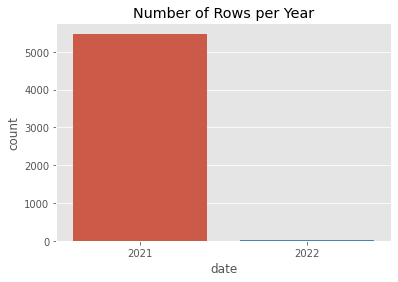

In [ ]:
plt.title('Number of Rows per Year')
sns.countplot(x=pd.to_datetime(df_full.date).dt.year);

Notamos que la información proviene prácticamente del un solo año, del 2021

In [ ]:
print(df_full.columns)
print(df_full.shape)

Index(['date', 'T_AMB', 'P_AMB', 'CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT',
       'LPT_IT', 'EXH_T', 'RH', 'WAR', 'POWER', 'FILE_ID', 'CUSTOMER_NAME',
       'PLANT_NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ENGINE_ID'],
      dtype='object')
(5490, 20)


In [ ]:
df_full.describe()

T_AMB        P_AMB     CMP_SPEED          CDP         GGDP  \
count  5490.000000  5490.000000   5490.000000  5490.000000  5490.000000   
mean     20.374075     0.978334   6417.889466     6.265058     2.323811   
std      11.537110     0.045696   3793.082652     3.616029     0.855249   
min     -15.949900     0.843017      0.000000     0.843212     0.843212   
25%      17.643511     0.949028   4499.382563     3.137928     1.690245   
50%      23.483962     0.998246   7823.908803     6.674973     2.552753   
75%      28.726957     1.011399   9658.852062     9.616167     3.072413   
max      32.858068     1.018659  10000.000000    12.390310     3.518858   

            HPT_IT          CDT       LPT_IT        EXH_T           RH  \
count  4337.000000  5490.000000  4337.000000  4337.000000  5490.000000   
mean   1182.098329   264.603400   860.669054   612.324913    53.384380   
std     118.879552   139.592527   143.582893   156.132793    23.805401   
min     878.785407   -15.931453   563.748217   332.933559    10.347066   
25%    1106.295284   207.557754   762.233458   503.424955    34.734872   
50%    1157.928077   334.796915   817.487211   554.500718    52.064385   
75%    1253.712362   367.034811   945.347814   705.181564    74.496531   
max    1600.690748   406.806058  1381.847685  1188.563234   100.000000   

               WAR         POWER     LATITUDE    LONGITUDE    ELEVATION  
count  5490.000000   4337.000000  5490.000000  5490.000000  5490.000000  
mean      0.000082  11730.214760     3.175054    73.477034   310.903213  
std       0.000042   3991.630810    24.996091    65.840261   416.506341  
min       0.000009   2720.133922   -31.151031   -63.054638   -29.000000  
25%       0.000053   8185.832753   -23.067557    42.939385    14.458365  
50%       0.000075  13473.368134     1.771092    76.411056   130.987930  
75%       0.000121  14972.032226    13.253365   130.962138   567.625122  
max       0.000156  17616.227967    61.170356   146.869226  1552.426025

# Valores faltantes

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5490 entries, 0 to 5489
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5490 non-null   object 
 1   T_AMB          5490 non-null   float64
 2   P_AMB          5490 non-null   float64
 3   CMP_SPEED      5490 non-null   float64
 4   CDP            5490 non-null   float64
 5   GGDP           5490 non-null   float64
 6   HPT_IT         4337 non-null   float64
 7   CDT            5490 non-null   float64
 8   LPT_IT         4337 non-null   float64
 9   EXH_T          4337 non-null   float64
 10  RH             5490 non-null   float64
 11  WAR            5490 non-null   float64
 12  POWER          4337 non-null   float64
 13  FILE_ID        5490 non-null   object 
 14  CUSTOMER_NAME  5490 non-null   object 
 15  PLANT_NAME     5490 non-null   object 
 16  LATITUDE       5490 non-null   float64
 17  LONGITUDE      5490 non-null   float64
 18  ELEVATIO

Se hace un recunto de los valores null por variable

In [ ]:
df_full[df_full["POWER"].isnull()].isnull().sum() 

date                0
T_AMB               0
P_AMB               0
CMP_SPEED           0
CDP                 0
GGDP                0
HPT_IT           1153
CDT                 0
LPT_IT           1153
EXH_T            1153
RH                  0
WAR                 0
POWER            1153
FILE_ID             0
CUSTOMER_NAME       0
PLANT_NAME          0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
ENGINE_ID           0
dtype: int64

Posteriormente calculamos que porcentaje de los valores son null, además, volvimos a notar que practicamente a cada null de POWER le corresponde otro null de las otras categorias

In [ ]:
df_full.isnull().sum()*100/len(df) 

date              0.000000
T_AMB             0.000000
P_AMB             0.000000
CMP_SPEED         0.000000
CDP               0.000000
GGDP              0.000000
HPT_IT           21.001821
CDT               0.000000
LPT_IT           21.001821
EXH_T            21.001821
RH                0.000000
WAR               0.000000
POWER            21.001821
FILE_ID           0.000000
CUSTOMER_NAME     0.000000
PLANT_NAME        0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
ELEVATION         0.000000
ENGINE_ID         0.000000
dtype: float64

A heatmap was used to visualize all the Null values, the white lines represent the null values.

Just 4 variables has missing data, including the target variable "POWER"

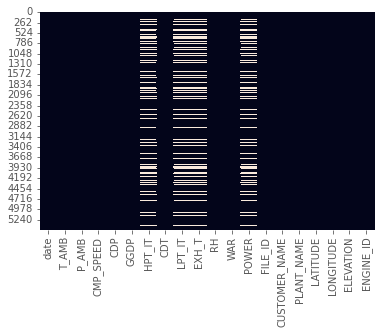

In [ ]:
sns.heatmap(df_full.isnull(), cbar=False)

Since "POWER" is the target we want to predict, we decided to drop the rows which have a null value

In [ ]:
df.dropna(subset=['POWER'], inplace = True) 

Once all the null values from the POWER column were eliminated, we noticed, that for each POWER missing value there were missing values in the other 3 columns, that correponds to:





*   High Pressure Turbine (HPT) inlet temperature (HPT_IT)
*   Low Pressure Turbine (LPT) inlet temperature (LPT_IT)
*   exhaust temperature (EXH_T)





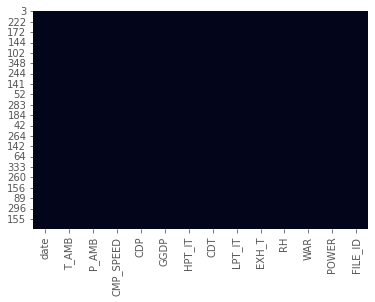

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

En seguida hacemos un recuento de los null por "PLANT_NAME"

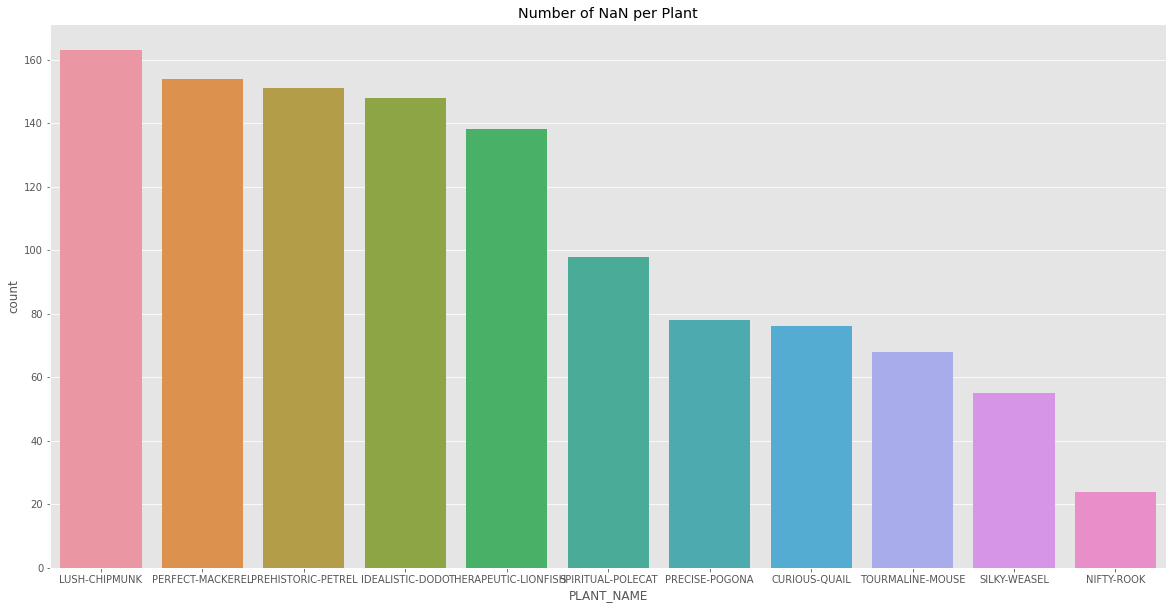

In [ ]:
order_plants=df_full[df_full["POWER"].isnull()]["PLANT_NAME"].value_counts().index
plt.figure(figsize=(20,10))
plt.title('Number of NaN per Plant')
sns.countplot(x=df_full[df_full["POWER"].isnull()]["PLANT_NAME"],order=order_plants);

In [ ]:
df_full.groupby("PLANT_NAME")["FILE_ID"].unique()

PLANT_NAME
CURIOUS-QUAIL                          [data_08.csv]
IDEALISTIC-DODO           [data_05.csv, data_06.csv]
LUSH-CHIPMUNK           [data_014.csv, data_015.csv]
NIFTY-ROOK                             [data_07.csv]
PERFECT-MACKEREL        [data_011.csv, data_012.csv]
PRECISE-POGONA                        [data_013.csv]
PREHISTORIC-PETREL                     [data_01.csv]
SILKY-WEASEL             [data_010.csv, data_09.csv]
SPIRITUAL-POLECAT                      [data_04.csv]
THERAPEUTIC-LIONFISH                   [data_02.csv]
TOURMALINE-MOUSE                       [data_03.csv]
Name: FILE_ID, dtype: object

En la siguiente celda hacemos el recuento de los valores null por cada uno de los archivos evaluados, 15 en total 

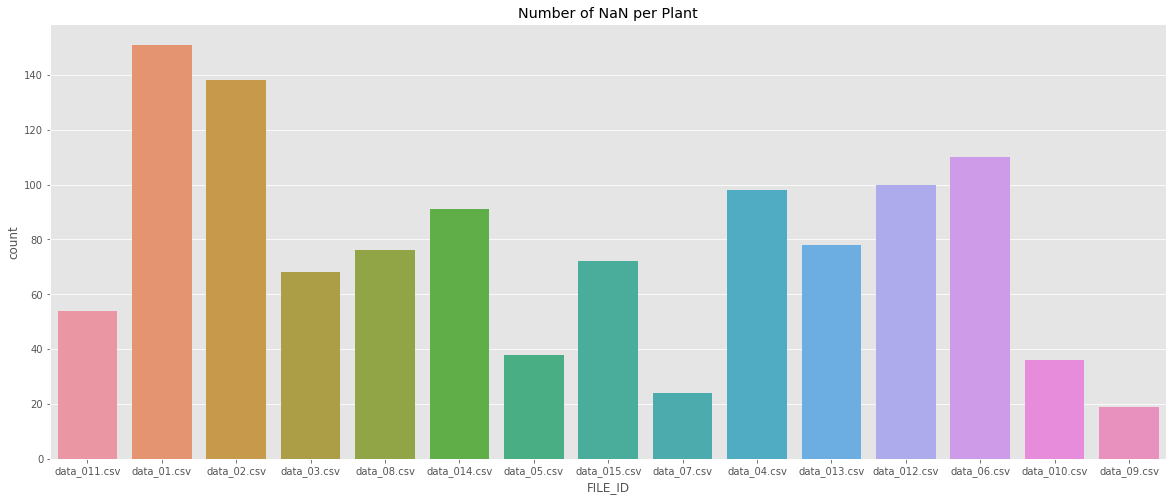

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Number of NaN per Plant')
sns.countplot(x=df_full[df_full["POWER"].isnull()]["FILE_ID"]);

In [ ]:
df_full.columns

Index(['date', 'T_AMB', 'P_AMB', 'CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT',
       'LPT_IT', 'EXH_T', 'RH', 'WAR', 'POWER', 'FILE_ID', 'CUSTOMER_NAME',
       'PLANT_NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ENGINE_ID'],
      dtype='object')

# Valores atípicos

Un análisis de los valores atípicos por variable fue realizado con el fin de evaluar y decidir si se tomarían en cuenta en los modelos, es decir, para evaluar de que manera van a influir a la hora de hacer predicciones con cada uno de los modelos evaluados

In [ ]:
cat =[ 'T_AMB', 'P_AMB', 'CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT',
       'LPT_IT', 'EXH_T', 'RH', 'WAR', 'POWER', 'FILE_ID', 'CUSTOMER_NAME',
       'PLANT_NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ENGINE_ID']

In [ ]:
def graficador(categoria):
  fig = px.histogram(df_full, 
                    x=categoria, 
                    marginal='box', 
                    nbins=47, 
                    title=categoria)
  fig.update_layout(bargap=0.1)
  fig.show()

<div class="alert alert-block alert-warning">
<b>Note:</b> The cell below contains a chart made in plotly, to visualize you must run the code.
</div>

In [ ]:
for i in cat :
  graficador(i)

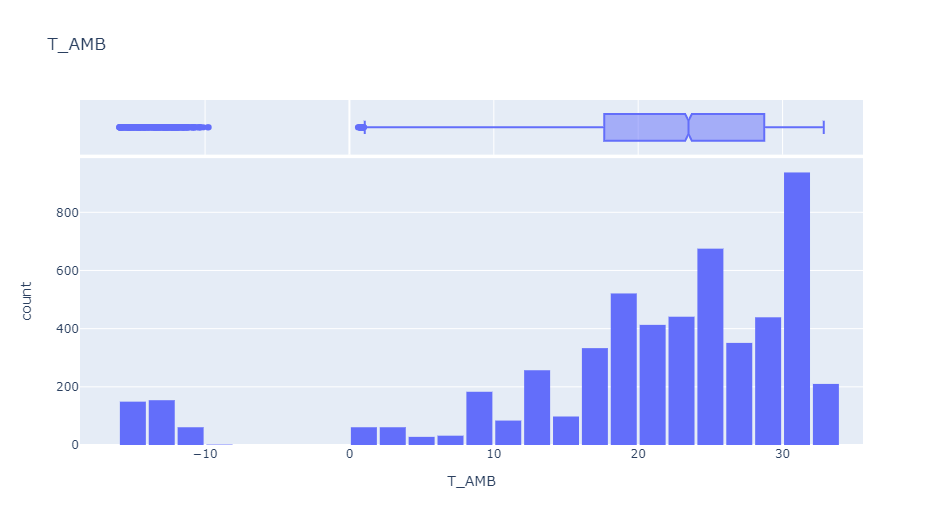

# Correlación 

To easy visualize any possible correlation between variables, a set of subplots were made, it helped us to graphically see the POWER values changes and compare them to other variables.

The subplots were usefull to identify some trends of the variables and see that some of them are pretty similar, also we notice that some negative peaks in POWER correspond to the higher values in other variables, like HPT_IT, HPT_IT and EXH_T.

This was the first approach to identify a clearly negative correlation in thos variables.

### Subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f993cf1f090>,
      dtype=object)

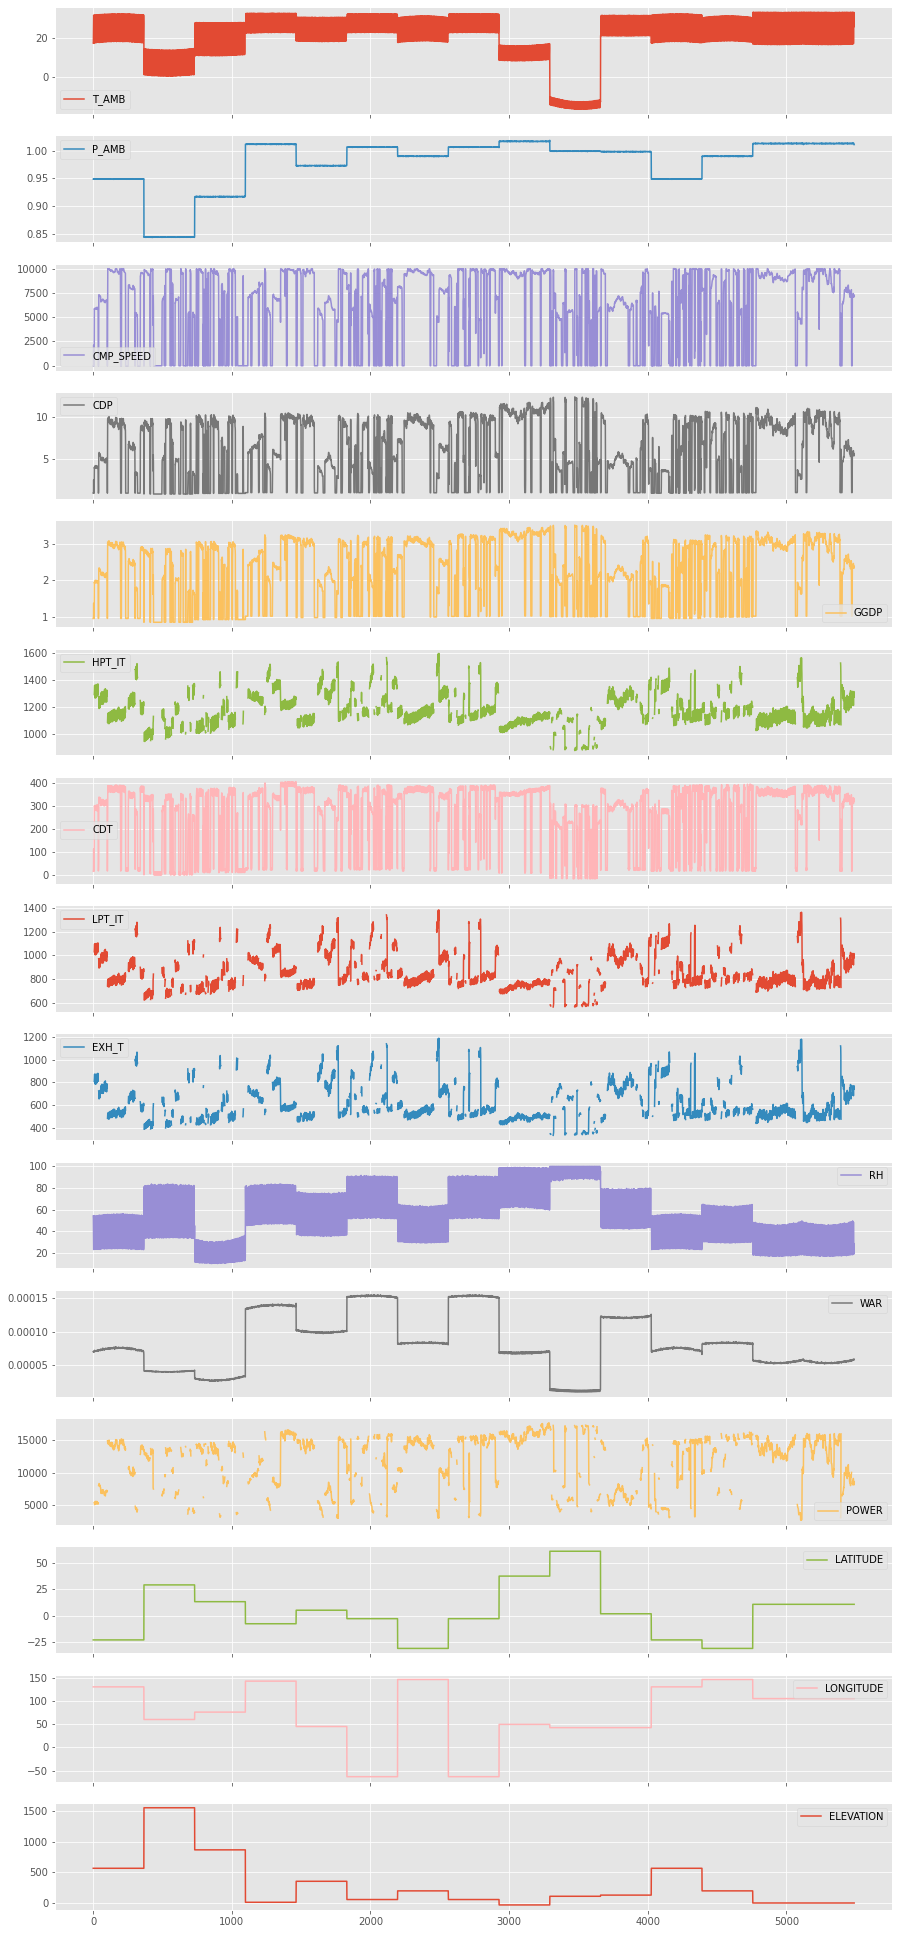

In [ ]:
# Poner graficas de Alberto subplots

df_full.plot(subplots=True, figsize=(15, 35))

In [ ]:
df_full.corr()['POWER']

T_AMB       -0.004338
P_AMB        0.155483
CMP_SPEED    0.758151
CDP          0.898743
GGDP         0.846911
HPT_IT      -0.746706
CDT          0.525526
LPT_IT      -0.863357
EXH_T       -0.903272
RH           0.017927
WAR         -0.049835
POWER        1.000000
LATITUDE     0.048687
LONGITUDE    0.034754
ELEVATION   -0.152488
Name: POWER, dtype: float64

### Heatmap 

<Figure size 432x288 with 0 Axes>

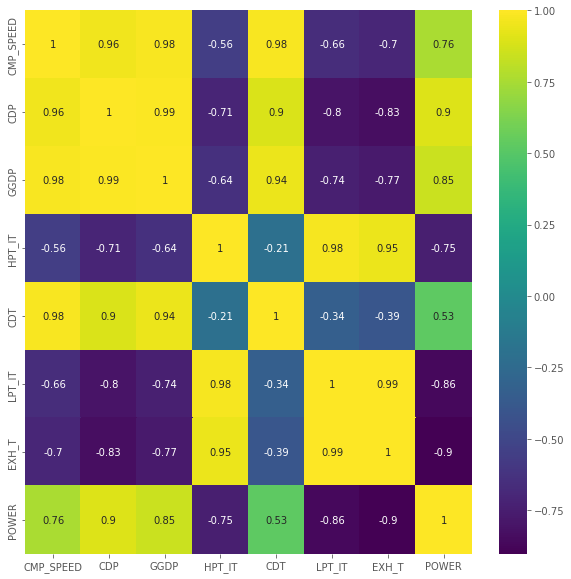

In [ ]:
plt.figure() 
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_full.corr(),annot=True,cmap='viridis',linecolor='black') 

### Pairplot

Para tener una visualizacioón mas clara sobre las correlaciones entre variables se utilizo un pairplot, en donde se compara la variable POWER con las demas, resaltando valores de acuerdo con el customer name para hacer diferencia entre los set de datos

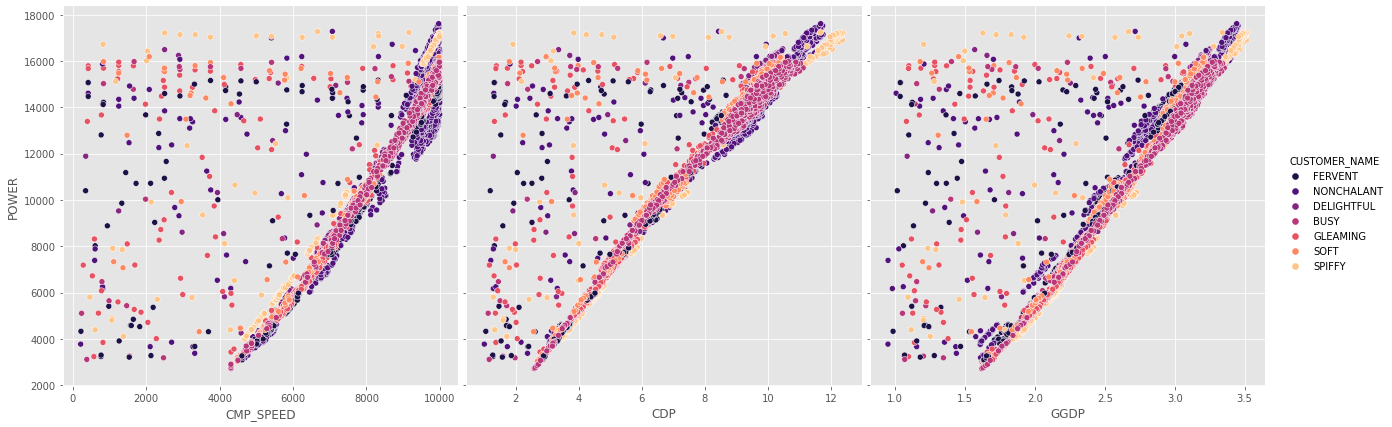

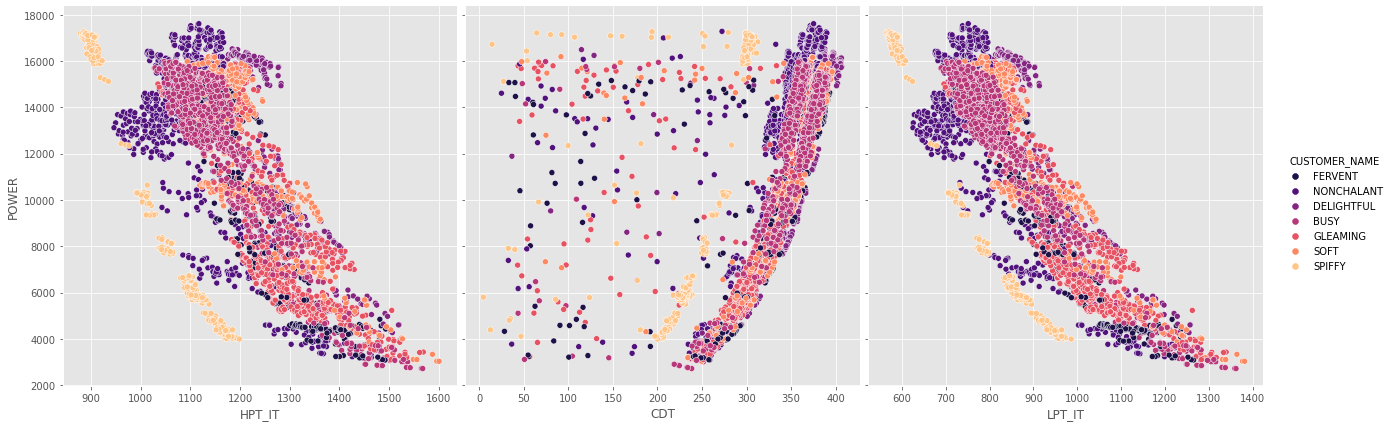

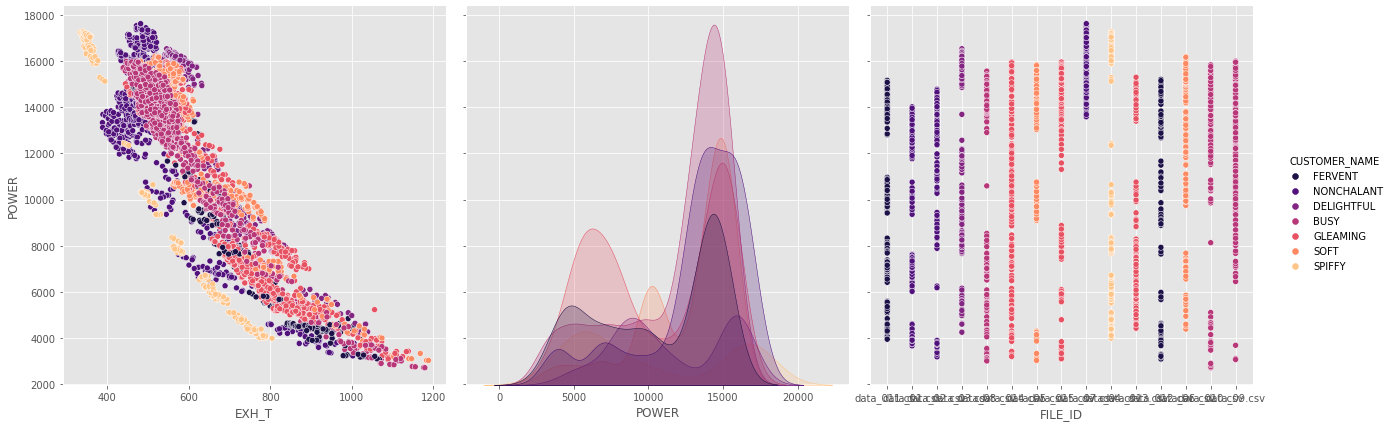

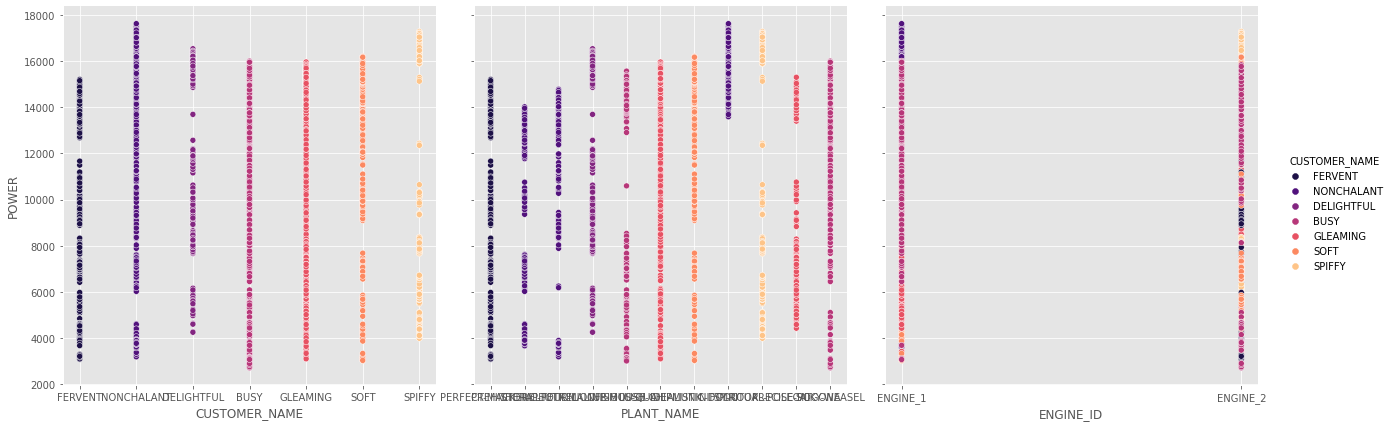

In [ ]:
for i in range(0, len(df_full.columns), 3):
    sns.pairplot(data=df_full,hue="CUSTOMER_NAME",
                x_vars=df_full.columns[i:i+3],
                y_vars=['POWER'],palette='magma',height=6)

Vamos a descartar las variables que tengan una pequeña correlación con la variable POWER, pues no influye... 

### <font color='pink'>A continuación se muestra el modelo utilizado en el submission con el cual se obtubo el mejor resultado, siendo de 362.42813. En este modelo se uso una red neuronal utilizando librerias como Tensorflow y keras</font>  

<div class="alert alert-block alert-warning">
<b>Note:</b> Con finalidades de simplicidad se muestra exclusivamente la cracion del modelo, implementacion y resultado, para consultar el código completo dirigirse al notebook indicado en la descripcion
</div>

### <font color='pink'>Data frame</font>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Datos_full.csv')

df_test = pd.read_csv('test_data_123.csv')

In [3]:
df.drop(['date', 'FILE_ID', 'CUSTOMER_NAME', 'PLANT_NAME', 'ENGINE_ID'], axis=1, inplace=True)

In [4]:
df_model = df[['CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T', 'POWER']]

In [5]:
df_model.head()

CMP_SPEED       CDP      GGDP       HPT_IT         CDT      LPT_IT  \
0     0.00000  0.948579  0.948579          NaN   17.309506         NaN   
1     0.00000  0.948324  0.948324          NaN   18.011018         NaN   
2     0.00000  0.948593  0.948593          NaN   25.274782         NaN   
3  2116.69558  2.517862  1.366369  1189.725775  114.011718  858.778442   
4     0.00000  0.949134  0.949134          NaN   30.534875         NaN   

        EXH_T         POWER  
0         NaN           NaN  
1         NaN           NaN  
2         NaN           NaN  
3  602.701668  10723.120355  
4         NaN           NaN

In [6]:
df_model.dropna(subset=['POWER'], inplace = True)

<ipython-input-6-a7c5d2b89a8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.dropna(subset=['POWER'], inplace = True)


### <font color='pink'>MinMaxScaler</font>

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_model)

In [8]:
training_set_scaled

array([[0.19464653, 0.13259421, 0.16241037, ..., 0.36062879, 0.31528606,
        0.53725402],
       [0.07837494, 0.04084192, 0.06627216, ..., 0.56879916, 0.55568767,
        0.18063829],
       [0.57917891, 0.2658131 , 0.39180593, ..., 0.6008391 , 0.58355316,
        0.17592933],
       ...,
       [0.71209269, 0.38880696, 0.54355449, ..., 0.5515317 , 0.51091233,
        0.37300921],
       [0.70179975, 0.38376796, 0.53863635, ..., 0.53928628, 0.50296088,
        0.36342248],
       [0.70681703, 0.39539945, 0.54902843, ..., 0.50854541, 0.47527031,
        0.37642499]])

In [9]:
X = training_set_scaled[:, 0:6]
Y = training_set_scaled[:, 7]

### <font color='pink'>Split training and test set</font>

In [10]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# <font color='pink'>NN</font>

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### <font color='pink'>Build NN Model</font>

In [12]:
# Función para crear la red neuronal
def build_model():
# La red neuronal tiene 4 capas con función de activación relu
    model = keras.Sequential([
        layers.Dense(5, activation = 'relu', input_shape = [6]),
        layers.Dense(5, activation = 'relu'),
        layers.Dense(3, activation = 'relu'),
        layers.Dense(1)
    ])

#   Optimizador RMS
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
#   Para obtener las metricas del modelo
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse', 'accuracy', 'mean_absolute_error'])
    
    return model

In [13]:
# Construcción del modelo
model = build_model()

In [14]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


### <font color='pink'>Fitting the training set</font>

In [15]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
82/82 [==============================] - 3s 6ms/step - loss: 0.1010 - mae: 0.2481 - mse: 0.1010 - accuracy: 3.8447e-04 - mean_absolute_error: 0.2481 - val_loss: 0.0289 - val_mae: 0.1296 - val_mse: 0.0289 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.1296
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0152 - mae: 0.0808 - mse: 0.0152 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0808 - val_loss: 0.0154 - val_mae: 0.0662 - val_mse: 0.0154 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0662
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0476 - mse: 0.0090 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0476 - val_loss: 0.0119 - val_mae: 0.0511 - val_mse: 0.0119 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0511
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0070 - mae: 0.0443 - mse: 0.0070 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0443 - val_lo

82/82 [==============================] - 0s 2ms/step - loss: 0.0023 - mae: 0.0316 - mse: 0.0023 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0316 - val_loss: 0.0024 - val_mae: 0.0294 - val_mse: 0.0024 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0294
Epoch 31/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0306 - mse: 0.0022 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0306 - val_loss: 0.0049 - val_mae: 0.0597 - val_mse: 0.0049 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0597
Epoch 32/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0310 - mse: 0.0022 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0310 - val_loss: 0.0038 - val_mae: 0.0496 - val_mse: 0.0038 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0496
Epoch 33/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0022 - mae: 0.0304 - mse: 0.0022 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0304 - val_loss: 0.002

82/82 [==============================] - 0s 3ms/step - loss: 0.0015 - mae: 0.0272 - mse: 0.0015 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0272 - val_loss: 0.0016 - val_mae: 0.0283 - val_mse: 0.0016 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0283
Epoch 60/100
82/82 [==============================] - 0s 4ms/step - loss: 0.0015 - mae: 0.0274 - mse: 0.0015 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0274 - val_loss: 0.0027 - val_mae: 0.0430 - val_mse: 0.0027 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0430
Epoch 61/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0014 - mae: 0.0260 - mse: 0.0014 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0260 - val_loss: 0.0019 - val_mae: 0.0322 - val_mse: 0.0019 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0322
Epoch 62/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0014 - mae: 0.0267 - mse: 0.0014 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0267 - val_loss: 0.001

82/82 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0262 - mse: 0.0013 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0262 - val_loss: 0.0032 - val_mae: 0.0496 - val_mse: 0.0032 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0496
Epoch 89/100
82/82 [==============================] - 0s 3ms/step - loss: 0.0012 - mae: 0.0254 - mse: 0.0012 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0254 - val_loss: 0.0011 - val_mae: 0.0231 - val_mse: 0.0011 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0231
Epoch 90/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0262 - mse: 0.0012 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0262 - val_loss: 0.0020 - val_mae: 0.0369 - val_mse: 0.0020 - val_accuracy: 0.0000e+00 - val_mean_absolute_error: 0.0369
Epoch 91/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - accuracy: 7.6894e-04 - mean_absolute_error: 0.0261 - val_loss: 0.003

### <font color='pink'>Metrics</font>

In [16]:
# Para obtener la exactitud y medición de errores por epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

loss       mae       mse  accuracy  mean_absolute_error  val_loss  \
0   0.100982  0.248148  0.100982  0.000384             0.248148  0.028858   
1   0.015214  0.080847  0.015214  0.000769             0.080847  0.015442   
2   0.008972  0.047640  0.008972  0.000769             0.047640  0.011867   
3   0.007014  0.044253  0.007014  0.000769             0.044253  0.009103   
4   0.005911  0.044244  0.005911  0.000769             0.044244  0.007564   
..       ...       ...       ...       ...                  ...       ...   
95  0.001205  0.026138  0.001205  0.000769             0.026138  0.001454   
96  0.001197  0.025460  0.001197  0.000769             0.025460  0.001402   
97  0.001184  0.025469  0.001184  0.000769             0.025469  0.000857   
98  0.001142  0.024580  0.001142  0.000769             0.024580  0.000875   
99  0.001224  0.026303  0.001224  0.000769             0.026303  0.001002   

     val_mae   val_mse  val_accuracy  val_mean_absolute_error  epoch  
0   0.129610  0.028858           0.0                 0.129610      0  
1   0.066249  0.015442           0.0                 0.066249      1  
2   0.051072  0.011867           0.0                 0.051072      2  
3   0.053663  0.009103           0.0                 0.053663      3  
4   0.047835  0.007564           0.0                 0.047835      4  
..       ...       ...           ...                      ...    ...  
95  0.029140  0.001454           0.0                 0.029140     95  
96  0.029354  0.001402           0.0                 0.029354     96  
97  0.018814  0.000857           0.0                 0.018814     97  
98  0.019070  0.000875           0.0                 0.019070     98  
99  0.021562  0.001002           0.0                 0.021562     99  

[100 rows x 11 columns]

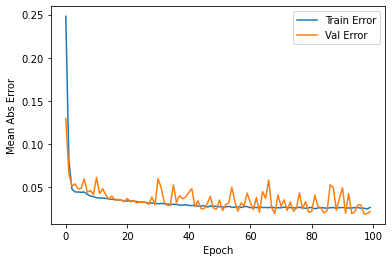

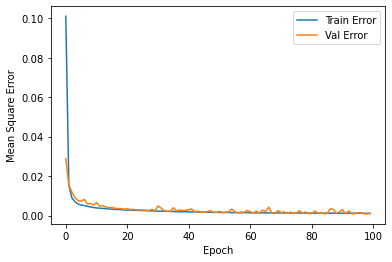

In [17]:
# Visualización del entrenamiento y validacioón por epoch
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

# <font color='pink'>Prediction</font>

In [18]:
# Predicción para el training y test set
new_X = model.predict(X_test)

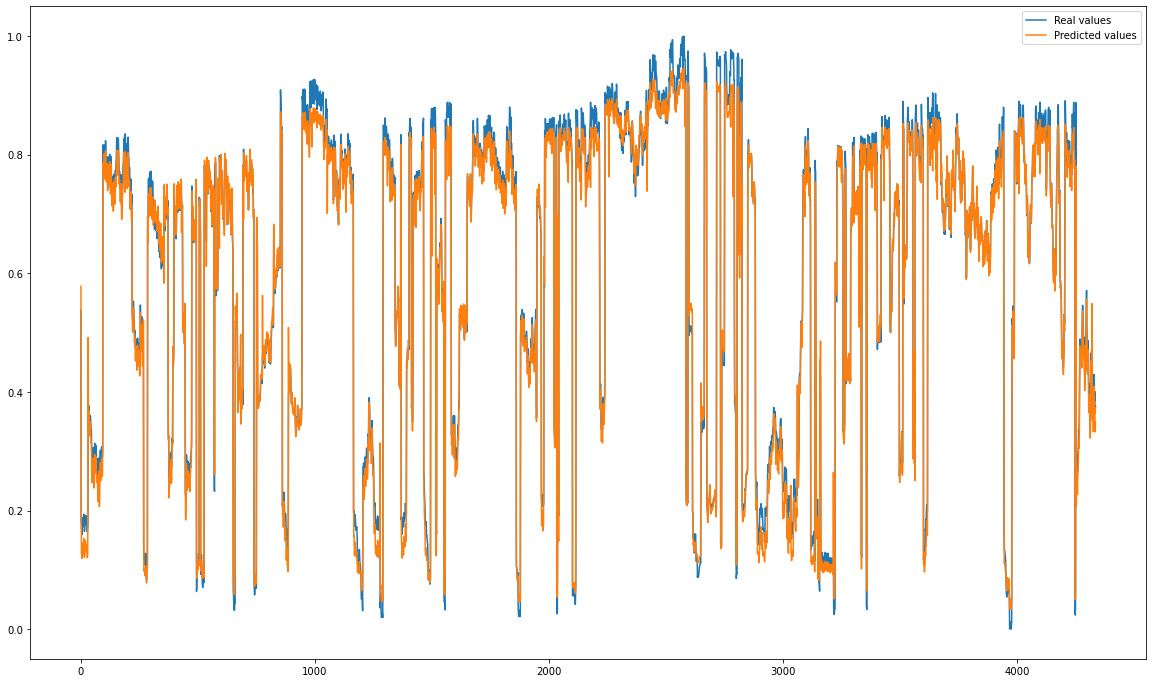

In [19]:
# Gráfica de los valores reales y predichos
fig, ax = plt.subplots(1, figsize=(20, 12))
plt.plot(Y)
plt.plot(model.predict(X))
# plt.plot(new_X)
plt.legend(['Real values', 'Predicted values'], loc='upper right')

### <font color='pink'>Loading the final test set</font>

In [20]:
# Carga del data test
df_test

date     T_AMB     P_AMB    CMP_SPEED        CDP      GGDP  \
0    2021-01-01  0.721750  1.001484  6637.409665   5.832015  2.416738   
1    2021-01-02  1.620703  1.001503  6655.303505   5.836681  2.417710   
2    2021-01-03  3.749595  1.001464  6543.075166   5.623416  2.373094   
3    2021-01-04  5.191938  1.001513  6613.171548   5.688147  2.386764   
4    2021-01-05  4.352311  1.001577  5512.789368   4.925938  2.159933   
..          ...       ...       ...          ...        ...       ...   
361  2021-12-28  0.556936  1.001259  9581.296097  10.943736  3.310195   
362  2021-12-29  2.592521  1.001448  9633.012266  10.946756  3.310970   
363  2021-12-30  3.891744  1.001528  9551.116001  10.707009  3.274651   
364  2021-12-31  3.133677  1.001643  9653.783643  10.953271  3.312269   
365  2022-01-01  1.668004  1.000711  9614.130520  10.936971  3.308284   

          HPT_IT         CDT      LPT_IT       EXH_T          RH       WAR  
0    1099.669907  275.264798  825.126859  605.488705  100.000000  0.000040  
1    1104.272571  277.170383  828.722891  608.297352   99.855070  0.000043  
2    1124.078913  278.159658  849.668850  629.152504   91.417221  0.000045  
3    1128.688645  282.134434  851.746149  629.516608   81.896271  0.000045  
4    1124.503274  234.921546  847.820191  625.910410   86.960921  0.000045  
..           ...         ...         ...         ...         ...       ...  
361  1000.932318  330.194483  671.294771  426.943344   99.834936  0.000040  
362  1010.706713  334.722621  678.576614  432.367956   92.113491  0.000042  
363  1022.111812  336.310510  689.693045  442.587092   84.624853  0.000043  
364  1013.887527  336.136880  680.884325  434.041650   88.783879  0.000042  
365  1007.057302  332.857678  675.867629  430.356736  100.000000  0.000043  

[366 rows x 12 columns]

### <font color='pink'>Select the variables</font>

In [21]:
# Las variables utilizadas basadas en correlaciones
df_4test = df_test[['CMP_SPEED', 'CDP', 'GGDP', 'HPT_IT', 'CDT', 'LPT_IT', 'EXH_T']]

### <font color='pink'>Scale the data between 0 and 1</font>

In [22]:
# Convertir los datos en un rango de 0 a 1 usando las función sc creada anteriormente
test_set_scaled = sc.fit_transform(df_4test)

In [23]:
X_test = test_set_scaled[:, 0:6]

### <font color='pink'>Use the model to predict POWER</font>

In [24]:
# Con los datos estandarizados hacemos la predicción usando el modelo de red neuronal previamente entrenado
x_pred = model.predict(X_test)

### <font color='pink'>Convert the array into a df</font>

In [25]:
# Convertir los resultados en un data frame
df_x_pred = pd.DataFrame(x_pred,
                        columns=['POWER'])

In [26]:
df_final = df_test["date"]

In [27]:
df_final_2 = pd.DataFrame(df_final,
                        columns=['date'])

In [28]:
df_final_2['POWER'] = df_x_pred['POWER']

### <font color='pink'>MinMaxScaler inverse</font>

In [29]:
# Calculo de minimo y maximo de los valores POWER
min = df['POWER'].min()
max = df['POWER'].max()

In [30]:
# Desestandarización de los valores calculados de POWER
df_final_2['POWER']=df_final_2['POWER'].apply(lambda x: x*(max-min) + min) 

In [31]:
df_final_2

date         POWER
0    2021-01-01   5139.432838
1    2021-01-02   5267.740522
2    2021-01-03   5173.958134
3    2021-01-04   5474.092319
4    2021-01-05   5997.959590
..          ...           ...
361  2021-12-28  13575.672969
362  2021-12-29  13866.626512
363  2021-12-30  13787.496304
364  2021-12-31  13980.066040
365  2022-01-01  13754.372300

[366 rows x 2 columns]

In [32]:
# Reemplazar los valores null con 0
df_final_2['POWER'] = df_final_2['POWER'].fillna(0)

### <font color='pink'>Set the correct date format</font>

In [33]:
# Juntamos las columnas de fecha con los valores predichos
BaseFinal = [df_final, df_final_2['POWER']]                                                                       # Ivana's code
headers = ["date", "POWER"]

df3 = pd.concat(BaseFinal, axis=1, keys=headers)
df3

date         POWER
0    2021-01-01   5139.432838
1    2021-01-02   5267.740522
2    2021-01-03   5173.958134
3    2021-01-04   5474.092319
4    2021-01-05   5997.959590
..          ...           ...
361  2021-12-28  13575.672969
362  2021-12-29  13866.626512
363  2021-12-30  13787.496304
364  2021-12-31  13980.066040
365  2022-01-01  13754.372300

[366 rows x 2 columns]

In [34]:
Array = df3[['date']].to_numpy()

In [35]:
# Función para cambiar formato de fecha
def formatito (jj):
  #jj es una fecha, que se encuentra en formado array eg.['2021-01-01']

  ll=jj.split('-')#Separa los string de fecha cada vez que ve '-'
  p=len(ll)#longitud de la separación, siempre será 3, pues queda en año, mes, día

  for i in range(0,p):
    temp=int(ll[i]) #El str lo vonertimos a int
    ll[i]=str(temp) #y ahora d eint a str 
    #Esto causa que los str '01' mediante esta funicón terminen siendo el string '1'
  for i in range(0,p):
    #Ahora intertimos el orden, intercambiamos el mes por día y el día por mes
    if i==1:
      tempo=ll[i]
      tempa=ll[i+1]
      ll[i+1]=tempo
      ll[i]=tempa
    
  ll.reverse() #Ponemos la fecha al revés, es decir, en el formato mes/día/año 
  nuevall=['/'.join(ll)]#Unimos los str por '/'
  return(nuevall) #Regresamos el formato correcto de fecha

In [36]:
def formatos (Array):
  #Array es el Array de fechas
  NuevoArray=[] #Sera el array donde estarán las fechas con formato correcto
  renglones,columnas=Array.shape 
  for i in range(0,renglones):
    for j in range(0,columnas):
      #Para cada fecha
      jj=Array[i,j] #aplicamos el formato correcto
      NuevoArray.append(formatito(jj)) #lo agregamos al array
  NuevoArray=np.array(NuevoArray)
  return(NuevoArray)

In [37]:
# Array con los formatos correctos de fecha
Konda= formatos(Array)

In [38]:
# Data frame con los formatos correctos de fecha
Fechisimas = pd.DataFrame(Konda)   

In [39]:
# Cambiamos la columna date con los formatos correctos
df3['date']=Fechisimas.values

# <font color='pink'>Final result</font>

In [40]:
df3 = df3.fillna(0)

In [41]:
# df3.to_csv('POWER.csv', index = None)

# <font color='pink'>El resultado obtenido con este modelo fue de 362.42813</font>